# Healthcare in Different States

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures.

This dataset might look a bit familiar to you — we used it in our lesson about describing histograms. The data originally came from the United State Health and Human Services Department (https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3).

Let’s use boxplots to find more meaning in this data!


## Investigate the Data

1. We’ve imported the dataset into a variable named `healthcare`. Let’s take a look at what data we have to work with. Print `healthcare.head()`. This will print the first five rows of the dataset.

    Scroll through the table to see what information we have. We know that we want to eventually look at the way heathcare works in different states. What column will be useful to do that?

In [2]:
healthcare = pd.read_csv('healthcare.csv')
# healthcare = healthcare.drop(["Unnamed: 0"], axis = 1)
healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [3]:
healthcare.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

*'Provider State' would be the best column to look at the way healthcare works in different states.*

In [4]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

2. We’re going to focus on only the ways in which hospitals charge patients for chest pain. But you could do this for any of the diagnoses in our dataset. Print `healthcare["DRG Definition"].unique()` to see all of the different diagnoses in our dataset.

    Can you find the official name of the diagnosis related to chest pain?

In [5]:
healthcare["DRG Definition"].unique()

# Chest pain is 313
# DRG means Diagnosis-Related Group

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

3. Let’s grab only the rows in the dataset that are about chest pain. Use this line of code to do that:

        chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

    If you’re interested in investigating a different diagnosis, replace '313 - CHEST PAIN' with the name of the other diagnosis. You might want to change the new variable name to be something other than `chest_pain` if you do this!

In [6]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']
# chest_pain

## Separating By State

4. We now want to separate the dataset by state. Eventually, we’ll use a `for` loop to do this for every state, but for now, let’s prove to ourselves that we can make a boxplot for one state.

    When we printed the head, we saw the first few rows had a `'Provider State'` of `"AL"`. Those were hospitals in Alabama.

    To get every chest pain diagnosis in Alabama, use this line of code:

        alabama_chest_pain = chest_pain[chest_pain['Provider State'] == "AL"]

    Make sure to use the variable that you created in the previous step. We called it `chest_pain`, but you might have named it something else if you used a different diagnosis.

    Again, feel free to use a state of your choosing instead of Alabama. Different state abbreviations should work, like `"CO"` or `"NY"`. Name your variable appropriately!

In [8]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == 'AL']
alabama_chest_pain.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53
82207,313 - CHEST PAIN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,34,6417.20,2808.08,1872.38
82208,313 - CHEST PAIN,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,33,13311.78,2997.00,2113.84
82209,313 - CHEST PAIN,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,74,21375.25,3339.94,2116.02


5. We’re almost there! We now have all of the hospitals in Alabama that have a diagnosed chest pain. We now want to find the average cost of those diagnoses. These value is stored in the column `' Average Covered Charges '` (Note the spaces at the start and the end of the string!)

    To get only these values, call this line of code:

        costs = alabama_chest_pain[' Average Covered Charges '].values

    Again, make sure that you’re using the correct variable names — yours might be different.

In [9]:
alabama_costs = alabama_chest_pain[' Average Covered Charges '].values
alabama_costs

array([19540.55, 20241.84,  6417.2 , 13311.78, 21375.25, 12569.92,
       12072.04,  9999.98,  7274.72,  6660.36, 15449.91,  9091.22,
       20074.9 , 21093.72, 39035.25, 23769.85,  4868.25, 18100.56,
        4308.61, 23505.03, 17560.85, 10957.75,  6935.45,  7216.7 ,
       14627.35,  7006.38, 24424.71,  8700.78, 12268.8 , 15938.66,
       11746.9 , 12790.15,  6131.62,  9824.6 , 11883.65, 13602.91,
       28750.57, 13358.27,  4610.73, 13840.5 , 14490.31, 12698.  ,
       10512.09,  7770.77, 22905.23, 33436.72, 11779.69, 20088.64,
        9561.2 , 10494.45, 14002.31, 14100.38])

6. Let’s now make a boxplot of those values! Call `plt.boxplot()` using costs as the first parameter.

    Then call `plt.show()` to see your boxplot!

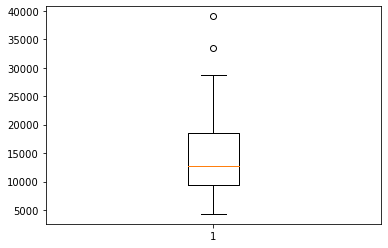

In [10]:
plt.boxplot(alabama_costs)
plt.show()

## Making a Boxplot for All States

7. Nice work! We’ve made a boxplot for one state. But how does that state compare to the others? Let’s make a boxplot for every state! Comment out (or delete) the two lines of code you just wrote to make the boxplot.

    To begin, we first need to create a list of all the states in our dataset. We can once again use the `unique()` function. We used this function when we looked at all of the diagnoses.

    Find all of the unique states from the dataset `chest_pain` and store it in a variable named states.

In [11]:
states = chest_pain['Provider State'].unique()
states

array(['MA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

8. We’ll now use a for loop to separate the dataset into a dataset for each state:

        datasets = []
        for state in states:
            datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

    `datasets` now contains 50 datasets — one for each state.

In [12]:
datasets = []
for state in states:
    datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

9. We’re about to draw 50 boxplots. Before we draw them, let’s make sure there’s enough room. Call `plt.figure(figsize=(20,6))`. This will make your figure long to allow room for so many boxplots!

10. Draw the boxplot using `datasets` as the first parameter. Add the second parameter `labels = states` to label your boxplots.

    Finally, make sure to call `plt.show()`.

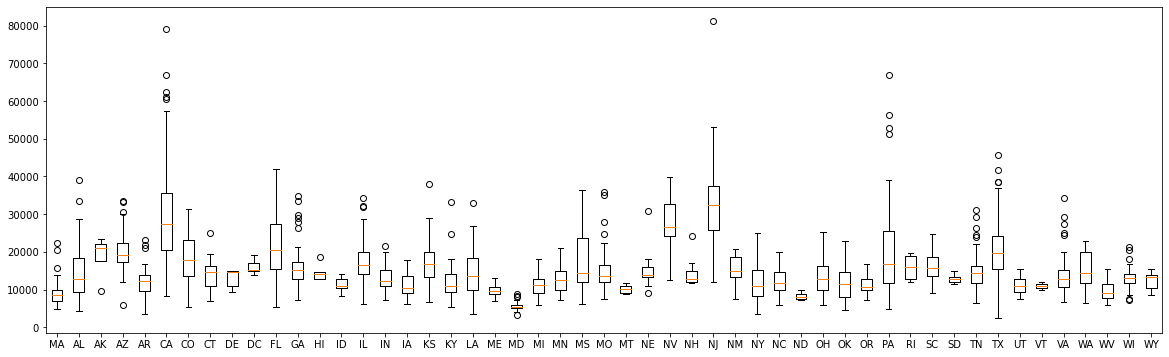

In [13]:
plt.figure(figsize=(20,6))
plt.boxplot(datasets, labels = states)
plt.show()

## Interpret and Explore

11. Nice work! You should now see 50 boxplots.

    What information have you learned by looking at these boxplots side by side? What state has the largest spread? What state has the largest median? Which states have the most outliers?
    
    - *California, New Jersey and Florida have the largest spreads, Vermont has almost none*

    - *New Jersey has the largest median cost for chest pain diagnosis, Maryland has the smallest*

    - *CA, GA, MO, PA, TN, VA, WI have a outliers*

12. Take some time to explore more from here. Here are some ways in which you can investigate the data more:

    - Look at diagnoses other than `'313 - CHEST PAIN'`.
    - Group states by regions. Maybe hospitals in the Northeast charge patients differently than hospitals in the South.
    - Plot something other than `' Average Covered Charges '`. You have data about how much Meidcare pays in the `'Average Medicare Payments'` column.

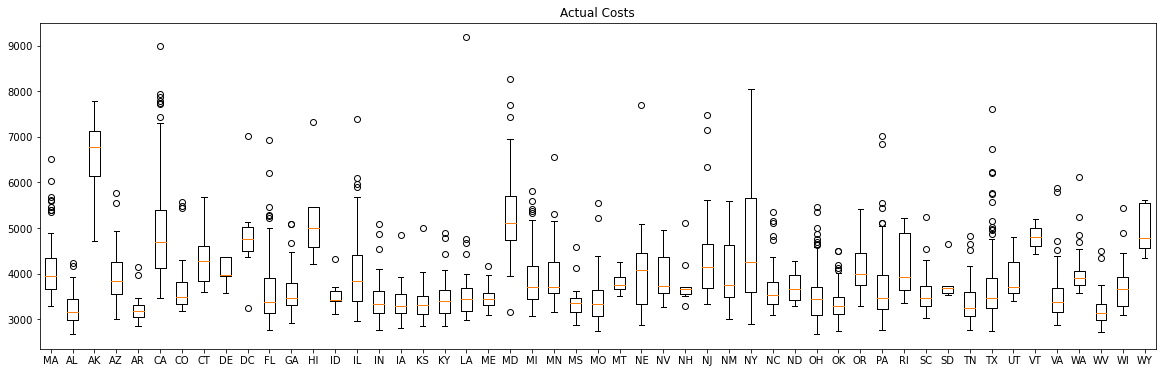

In [14]:
# Diagnosis other than chest pain? Group states by regions. Plot actual payments.
actual_cost_datasets = []
for state in states:
    actual_cost_datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Total Payments '].values)
    
plt.figure(figsize=(20,6))
plt.boxplot(actual_cost_datasets, labels = states)
plt.title('Actual Costs')
plt.show()

In [15]:
states

array(['MA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Using this list https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv to determine regions.

In [16]:
# add a column for region to the chest_pain datafram
regions = {'AK': 'West','AL': 'South','AR': 'South','AZ': 'West','CA': 'West','CO': 'West','CT': 'Northeast','DC': 'South',
           'DE': 'South','FL': 'South','GA': 'South','HI': 'West','IA': 'Midwest','ID': 'West','IL': 'Midwest','IN': 'Midwest',
           'KS': 'Midwest','KY': 'South','LA': 'South','MA': 'Northeast','MD': 'South','ME': 'Northeast','MI': 'Midwest',
           'MN': 'Midwest','MO': 'Midwest','MS': 'South','MT': 'West','NC': 'South','ND': 'Midwest','NE': 'Midwest',
           'NH': 'Northeast','NJ': 'Northeast','NM': 'West','NV': 'West','NY': 'Northeast','OH': 'Midweat','OK': 'South',
           'OR': 'West','PA': 'Northeast','RI': 'Northeast','SC': 'South','SD': 'Midwest','TN': 'South','TX': 'South',
           'UT': 'West','VA': 'South','VT': 'Northeast','WA': 'West','WI': 'Midwest','WV': 'South','WY': 'West'
}
chest_pain['Regions'] = chest_pain['Provider State'].map(regions)
chest_pain.head()

C:\Users\Becki\AppData\Local\Temp/ipykernel_3496/4253733219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_pain['Regions'] = chest_pain['Provider State'].map(regions)


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Regions
80531,313 - CHEST PAIN,220108,MILTON HOSPITAL INC,199 REEDSDALE ROAD,MILTON,MA,2186,MA - Boston,43,6760.53,3547.00,2633.04,Northeast
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38,South
82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53,South
82207,313 - CHEST PAIN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,34,6417.20,2808.08,1872.38,South
82208,313 - CHEST PAIN,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,33,13311.78,2997.00,2113.84,South


In [18]:
# find the costs in each region
costs_regions = []
for region in regions:
    costs_regions.append(chest_pain[chest_pain['Regions'] == region][' Average Covered Charges '].values)
costs_regions

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 

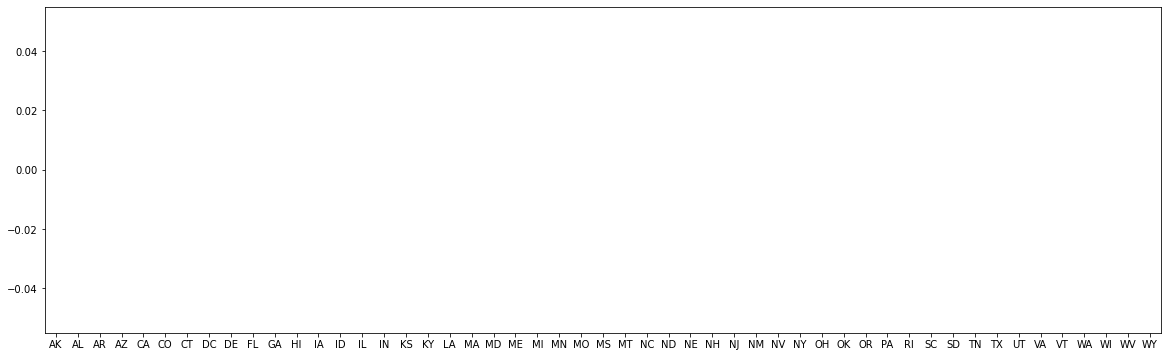

In [19]:
plt.figure(figsize=(20,6))

# Draw the boxplot using datasets as the first parameter. 
# Add the second parameter labels = states to label your boxplots.

plt.boxplot(costs_regions, labels = regions)
plt.show()